# SkyCoord

In [1]:
from astropy.coordinates import SkyCoord

In [2]:
pos = SkyCoord(0.2, 0.1, frame='galactic', unit='deg')

In [3]:
pos

<SkyCoord (Galactic): (l, b) in deg
    ( 0.2,  0.1)>

In [4]:
pos.data.lon

<Longitude 0.2 deg>

In [5]:
pos.data.lat

<Latitude 0.1 deg>

In [6]:
pos.frame.name

'galactic'

In [7]:
pos2 = pos.icrs # creates a new SkyCoord object in the icrs frame

In [8]:
pos2

<SkyCoord (ICRS): (ra, dec) in deg
    ( 266.42648314, -28.71336544)>

In [9]:
pos2.data.lon.deg

266.4264831433104

In [10]:
pos2.data.lat.deg

-28.713365439899146

In [11]:
# Another way to transform between sky coordinate frames
pos.transform_to('icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    ( 266.42648314, -28.71336544)>

Sky coordinate systems:

* ICRS = RADEC: equator (declination = 0 deg) is Earth's equator
* Galactic: equator (Galactic latitude = 0 deg) is plane of the Milky Way (our Galaxy)

These two coordinate systems are simply rotated with respect to each other.

# WCS

* See http://astropy.readthedocs.io/en/latest/wcs/index.html

In [12]:
import numpy as np
from astropy.wcs import WCS

In [13]:
# Create WCS object
# A WCS object defines a "transformation"
# or "projection" from pixel to world coordinate
# world and sky coordinates are the same
w = WCS(naxis=2)

w.wcs.crpix = [-234.75, 8.3393]
w.wcs.cdelt = np.array([-0.066667, 0.066667])
w.wcs.crval = [0, -90]
w.wcs.ctype = ["RA---AIR", "DEC--AIR"]
w.wcs.set_pv([(2, 1, 45.0)])

w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---AIR'  'DEC--AIR'  
CRVAL : 0.0  -90.0  
CRPIX : -234.75  8.3392999999999997  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.066667000000000004  0.066667000000000004  
NAXIS : 0  0

In [14]:
# Some pixel coordinates of interest.
# pixcrd = np.array([[0, 0], [24, 38], [45, 98]], np.float_)
pixcrd = [[0, 0]] # x, y

# Convert pixel coordinates to world coordinates
world = w.wcs_pix2world(pixcrd, 1)
print(world) # lon, lat

[[ 267.96547027  -73.73660749]]


In [15]:
# You can go the other way
# Let's transform the world coordinates
# back to pixel coordinates
# This should give the same as the initial pixel coords
pix2 = w.wcs_world2pix(world, 1)
pix2

array([[  1.16529009e-12,  -2.80664381e-13]])

[[ 256.  256.]]


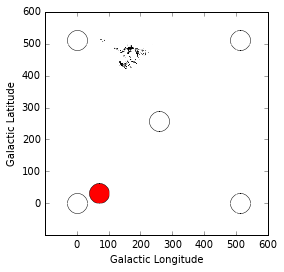

In [34]:
# Usually WCS objects are created from FITS headers
# You have a FITS file with a sky image
# The header contains the WCS parameters

# Example from here: http://astropy.readthedocs.io/en/latest/visualization/wcsaxes/index.html
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

# filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')
filename = '/media/adeel/643459A034597650/Projects/GSoC/OpenAstronomy/HiPS repository/hips-extra/datasets/samples/DSS2Red/Norder3/Dir0/Npix451.fits'

hdu = fits.open(filename)[0]
print(hdu)
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower', cmap='gray')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
# To plot a marker at a given pixel position
plt.plot(70, 30, 'o', ms=20, c='red')

# To plot a marker at a given sky position (method 1)
tile_center = [hdu.data.shape[0] / 2, hdu.data.shape[1] / 2]
corner_1 = np.array([[0, 0]], dtype='int')
corner_2 = np.array([[0, hdu.data.shape[0]]], dtype='int')
corner_3 = np.array([[hdu.data.shape[1], 0]], dtype='int')
corner_4 = np.array([[hdu.data.shape[0], hdu.data.shape[1]]], dtype='int')

world_pos = np.array([tile_center], dtype='int') # Galactic position in deg
pix_pos = wcs.wcs_world2pix(world_pos, 1)
corner_1 = wcs.wcs_world2pix(corner_1, 1)
corner_2 = wcs.wcs_world2pix(corner_2, 1)
corner_3 = wcs.wcs_world2pix(corner_3, 1)
corner_4 = wcs.wcs_world2pix(corner_4, 1)

print(pix_pos)
plt.plot(pix_pos[0][0], pix_pos[0][1], 'o', ms=20, c='white')
plt.plot(corner_1[0][0], corner_1[0][1], 'o', ms=20, c='white')
plt.plot(corner_2[0][0], corner_2[0][1], 'o', ms=20, c='white')
plt.plot(corner_3[0][0], corner_3[0][1], 'o', ms=20, c='white')
plt.plot(corner_4[0][0], corner_4[0][1], 'o', ms=20, c='white')

# Second way to plot at given sky position
# Read through and work through this 
# http://astropy.readthedocs.io/en/latest/visualization/wcsaxes/overlays.html

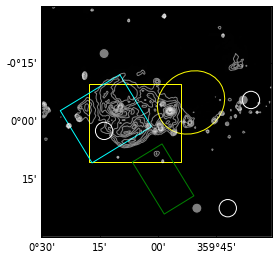

In [106]:
# testing out the second method

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.visualization.wcsaxes import WCSAxes

filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')
# filename = '/media/adeel/643459A034597650/Projects/GSoC/OpenAstronomy/HiPS repository/hips-extra/datasets/samples/DSS2Red/Norder3/Dir0/Npix451.fits'

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

fig = plt.figure()

ax = WCSAxes(fig, [0.1, 0.1, 0.8, 0.8], wcs=wcs)

fig.add_axes(ax)  # note that the axes have to be explicitly added to the figure

# The following line makes it so that the zoom level no longer changes,
# otherwise Matplotlib has a tendency to zoom out when adding overlays.
# ax.set_autoscale_on(False)

# Add a rectangle with bottom left corner at pixel position (30, 50) with a
# width and height of 60 and 50 pixels respectively.

from matplotlib.patches import Rectangle
r = Rectangle((30., 50.), 60., 50., edgecolor='yellow', facecolor='none')
ax.add_patch(r)

# Add three markers at (40, 30), (100, 130), and (130, 60). The facecolor is
# a transparent white (0.5 is the alpha value).
ax.scatter([40, 100, 130], [30, 130, 60], s=100, edgecolor='black', facecolor=(1, 1, 1, 0.5))
ax.scatter([40, 120, 135], [80, 130, 60], s=300, edgecolor='white', facecolor='none')

r = Rectangle((266.0, -28.9), 0.3, 0.15, edgecolor='green', facecolor='none',
              transform=ax.get_transform('fk5'))
ax.add_patch(r)

from matplotlib.patches import Circle

r = Rectangle((266.4, -28.9), 0.3, 0.3, edgecolor='cyan', facecolor='none',
              transform=ax.get_transform('fk5'))
ax.add_patch(r)

c = Circle((266.4, -29.1), 0.15, edgecolor='yellow', facecolor='none',
              transform=ax.get_transform('fk5'))
ax.add_patch(c)

ax.contour(hdu.data, levels=np.logspace(-4.7, -3., 10), colors='white', alpha=0.5)
ax.imshow(hdu.data, cmap='gray')

In [ ]:
filename

In [ ]:
hdu = fits.open(filename)[0]

In [ ]:
type(hdu.data)

In [ ]:
hdu.data.shape

In [ ]:
plt.imshow(hdu.data)

In [ ]:
wcs
# GLON / GLAT shows that it's in Galactic coords
# CAR is the projection type
# Other parameters define the projection
# between pixel and world coordinates

# You don't have to read this:
# Standard paper defining FITS: http://adsabs.harvard.edu/abs/2010A%26A...524A..42P
# Papers defining WCS: https://fits.gsfc.nasa.gov/fits_wcs.html